In [1]:
!pip install -r requirements.txt


In [2]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

In [3]:
df_reportes = pd.read_csv('data/Reportes.csv', delimiter=',')

In [4]:
df_capturas = pd.read_csv('data/Capturas.csv', delimiter=',')

In [5]:
df_reportes_intrafamiliar = pd.read_csv('data/Reporte_Intrafamiliar.csv', delimiter=',')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df_reportes["GENERO"] = df_reportes["GENERO"].replace(
       { "NO REPORTA": "NO REPORTADO"})
df_reportes.head(-40)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito
0,CAQUETÁ,SOLANO,18756000.0,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS
1,BOLÍVAR,CARTAGENA (CT),13001000.0,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADOLECENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
2,HUILA,LA PLATA,41396000.0,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
3,SANTANDER,PIEDECUESTA,68547000.0,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
4,META,VILLAVICENCIO (CT),50001000.0,CONTUNDENTES,1/01/2010,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
...,...,...,...,...,...,...,...,...,...
260278,VALLE,YUMBO,76892000.0,SIN EMPLEO DE ARMAS,19/02/2022,FEMENINO,ADOLESCENTES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...
260279,VALLE,YUMBO,76892000.0,SIN EMPLEO DE ARMAS,21/02/2022,FEMENINO,ADOLESCENTES,1,ARTÍCULO 206. ACTO SEXUAL VIOLENTO
260280,VALLE,YUMBO,76892000.0,SIN EMPLEO DE ARMAS,28/02/2022,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS
260281,VALLE,YUMBO,76892000.0,SIN EMPLEO DE ARMAS,1/03/2022,FEMENINO,ADOLESCENTES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...


In [7]:
df_capturas.head(10)

,FECHA,PAIS,MUNICIPIO,DELITO,CIRCUNSTACIA DE LA CAPTURA,PAIS CAPTURADO,GENERO,ZONA
0,6/16/22,COLOMBIA,RIOHACHA (CT),ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA
1,6/16/22,COLOMBIA,SAN JOSÉ DEL GUAVIARE (CT),ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA
2,6/16/22,COLOMBIA,SANTA ROSA DE CABAL,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,RURAL
3,6/16/22,COLOMBIA,VALLEDUPAR (CT),ARTÍCULO 206. ACTO SEXUAL VIOLENTO,ORDEN JUDICIAL LEY 906,NO REPORTADO,MASCULINO,URBANA
4,6/16/22,COLOMBIA,VILLETA,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA
5,6/15/22,COLOMBIA,CALDAS,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,RURAL
6,6/15/22,COLOMBIA,EL DONCELLO,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA
7,6/15/22,COLOMBIA,ENTRERRIOS,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA
8,6/15/22,COLOMBIA,FLORENCIA (CT),ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,FLAGRANCIA LEY 906,COLOMBIA,MASCULINO,URBANA
9,6/15/22,COLOMBIA,IBAGUÉ (CT),ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA


In [8]:
df_reportes_intrafamiliar.head(10)



,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
5,SUCRE,SINCELEJO (CT),70001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
6,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,2
7,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,2
8,VALLE,TULUÁ,76834000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
9,HUILA,PITALITO,41551000,ARMA DE FUEGO,1/01/2010,FEMENINO,ADULTOS,1


In [9]:
df_departamentos = df_reportes.drop_duplicates(['MUNICIPIO'], keep='first')

In [10]:
df_departamentos.drop(["CODIGO DANE","ARMAS MEDIOS","FECHA HECHO","GENERO","GRUPO ETARIO","CANTIDAD","delito"], axis = 'columns', inplace=True)
df_departamentos.head(10)
                    

/home/jovyan/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,DEPARTAMENTO,MUNICIPIO
0,CAQUETÁ,SOLANO
1,BOLÍVAR,CARTAGENA (CT)
2,HUILA,LA PLATA
3,SANTANDER,PIEDECUESTA
4,META,VILLAVICENCIO (CT)
6,CUNDINAMARCA,BOGOTÁ D.C. (CT)
7,BOYACÁ,PAYA
10,VALLE,CALI (CT)
11,CAQUETÁ,SAN VICENTE DEL CAGUÁN
12,GUAJIRA,RIOHACHA (CT)


In [11]:
df_departamentos_capturas = pd.merge(df_capturas, df_departamentos, on='MUNICIPIO', how='left')

In [12]:
df_departamentos_capturas.head(10)

,FECHA,PAIS,MUNICIPIO,DELITO,CIRCUNSTACIA DE LA CAPTURA,PAIS CAPTURADO,GENERO,ZONA,DEPARTAMENTO
0,6/16/22,COLOMBIA,RIOHACHA (CT),ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA,GUAJIRA
1,6/16/22,COLOMBIA,SAN JOSÉ DEL GUAVIARE (CT),ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA,GUAVIARE
2,6/16/22,COLOMBIA,SANTA ROSA DE CABAL,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,RURAL,RISARALDA
3,6/16/22,COLOMBIA,VALLEDUPAR (CT),ARTÍCULO 206. ACTO SEXUAL VIOLENTO,ORDEN JUDICIAL LEY 906,NO REPORTADO,MASCULINO,URBANA,CESAR
4,6/16/22,COLOMBIA,VILLETA,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA,CUNDINAMARCA
5,6/15/22,COLOMBIA,CALDAS,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,RURAL,ANTIOQUIA
6,6/15/22,COLOMBIA,EL DONCELLO,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA,CAQUETÁ
7,6/15/22,COLOMBIA,ENTRERRIOS,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA,ANTIOQUIA
8,6/15/22,COLOMBIA,FLORENCIA (CT),ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,FLAGRANCIA LEY 906,COLOMBIA,MASCULINO,URBANA,CAQUETÁ
9,6/15/22,COLOMBIA,IBAGUÉ (CT),ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ORDEN JUDICIAL LEY 906,COLOMBIA,MASCULINO,URBANA,TOLIMA


In [13]:
print(df_departamentos_capturas.sort_values(by = 'DEPARTAMENTO', ascending = False))

        FECHA      PAIS            MUNICIPIO  \
490   5/15/22  COLOMBIA  PUERTO CARREÑO (CT)   
1070  3/28/22  COLOMBIA  PUERTO CARREÑO (CT)   
893   4/11/22  COLOMBIA  PUERTO CARREÑO (CT)   
894   4/11/22  COLOMBIA  PUERTO CARREÑO (CT)   
1082  3/27/22  COLOMBIA  PUERTO CARREÑO (CT)   
...       ...       ...                  ...   
862   4/16/22  COLOMBIA        PUERTO NARIÑO   
1151  3/23/22  COLOMBIA         LETICIA (CT)   
2096  1/29/22  COLOMBIA         LETICIA (CT)   
2124  1/27/22  COLOMBIA         LETICIA (CT)   
202    6/1/22  COLOMBIA         LETICIA (CT)   

                                                 DELITO  \
490                ARTÍCULO 205. ACCESO CARNAL VIOLENTO   
1070  ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...   
893                ARTÍCULO 205. ACCESO CARNAL VIOLENTO   
894                ARTÍCULO 205. ACCESO CARNAL VIOLENTO   
1082     ARTÍCULO 213 A. PROXENETISMO CON MENOR DE EDAD   
...                                                 ...   
862       

In [14]:
#Corroborar que todos los valores tengan valores
df_departamentos_capturas.isnull().any(axis=1).sum()

0

In [15]:
df_reportes['FECHA HECHO'] = pd.to_datetime(df_reportes['FECHA HECHO'], format='%d/%m/%Y')

In [16]:
df_reportes2022 = df_reportes.loc[df_reportes["FECHA HECHO"]>="2022-01-01"]

df_reportes2022.head(10)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito
252334,AMAZONAS,LETICIA (CT),91001000.0,ARMA BLANCA / CORTOPUNZANTE,2022-02-05,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
252335,AMAZONAS,LETICIA (CT),91001000.0,ARMA BLANCA / CORTOPUNZANTE,2022-03-01,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
252336,AMAZONAS,LETICIA (CT),91001000.0,ARMA BLANCA / CORTOPUNZANTE,2022-03-15,FEMENINO,ADOLESCENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
252337,ANTIOQUIA,AMAGÁ,5030000.0,ARMA BLANCA / CORTOPUNZANTE,2022-03-02,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
252338,ANTIOQUIA,AMAGÁ,5030000.0,ARMA BLANCA / CORTOPUNZANTE,2022-03-03,MASCULINO,ADOLESCENTES,1,ARTÍCULO 206. ACTO SEXUAL VIOLENTO
252339,ANTIOQUIA,APARTADÓ,5045000.0,ARMA BLANCA / CORTOPUNZANTE,2022-02-25,FEMENINO,ADOLESCENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
252340,ANTIOQUIA,APARTADÓ,5045000.0,ARMA BLANCA / CORTOPUNZANTE,2022-03-23,FEMENINO,MENORES,1,ARTÍCULO 206. ACTO SEXUAL VIOLENTO
252341,ANTIOQUIA,BELLO,5088000.0,ARMA BLANCA / CORTOPUNZANTE,2022-02-07,FEMENINO,ADOLESCENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
252342,ANTIOQUIA,BELLO,5088000.0,ARMA BLANCA / CORTOPUNZANTE,2022-02-13,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
252343,ANTIOQUIA,BETANIA,5091000.0,ARMA BLANCA / CORTOPUNZANTE,2022-03-18,MASCULINO,MENORES,1,ARTÍCULO 206. ACTO SEXUAL VIOLENTO


<AxesSubplot:title={'center':'Reportes de casos por genero'}, xlabel='Año'>

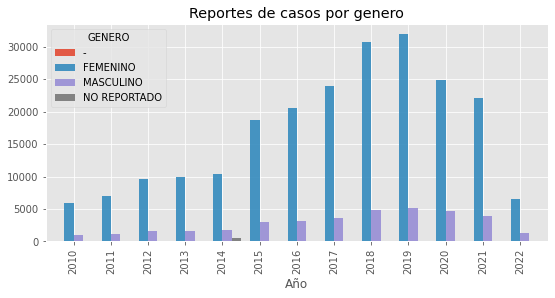

In [22]:
Reporte_Genero_Año = df_reportes.groupby(["Año", "GENERO"]).size().unstack(fill_value=0)

Reporte_Genero_Año.plot(kind='bar',title='Reportes de casos por genero',alpha = 0.9, width = 1, figsize=(9,4))

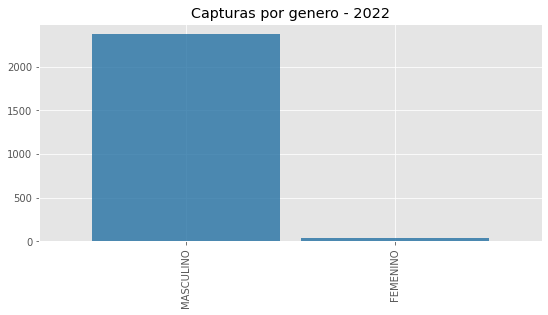

In [27]:
plot_genero_capturas = df_capturas['GENERO'].value_counts().plot(kind='bar',
                                            title='Capturas por genero - 2022',alpha = 0.8, width = 0.9, figsize=(9,4), color ="#2471A3")

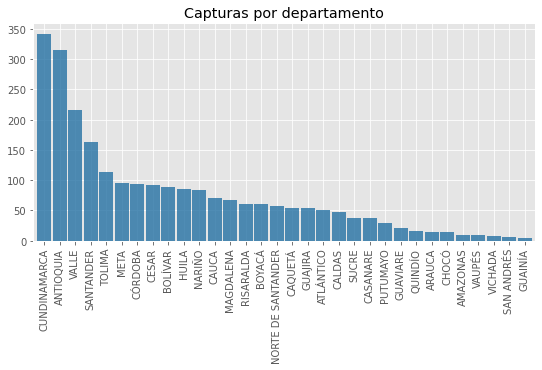

In [19]:
plot = df_departamentos_capturas['DEPARTAMENTO'].value_counts().plot(kind='bar',
                                            title='Capturas por departamento',alpha = 0.8, width = 0.9, figsize=(9,4), color ="#2471A3")

In [20]:
Casos_departamento_reportes = df_reportes2022.groupby(["DEPARTAMENTO"]).size().reset_index()
Casos_departamento_capturas = df_departamentos_capturas.groupby(["DEPARTAMENTO"]).size().reset_index()
plot_Size_departamento = pd.merge(Casos_departamento_reportes, Casos_departamento_capturas, on='DEPARTAMENTO', how="outer")
plot_Size_departamento.rename(columns = {'0_x':'Reportes', '0_y':'Capturas'}, inplace = True)
plot_Size_departamento.sort_values(by=['Reportes'], inplace=True, ascending=False)
plot_Size_departamento

,DEPARTAMENTO,Reportes,Capturas
12,CUNDINAMARCA,1825,342
1,ANTIOQUIA,1143,315
29,VALLE,673,215
26,SANTANDER,371,163
4,BOLÍVAR,355,88
28,TOLIMA,325,114
20,NARIÑO,285,83
17,HUILA,278,85
3,ATLÁNTICO,262,50
5,BOYACÁ,240,60


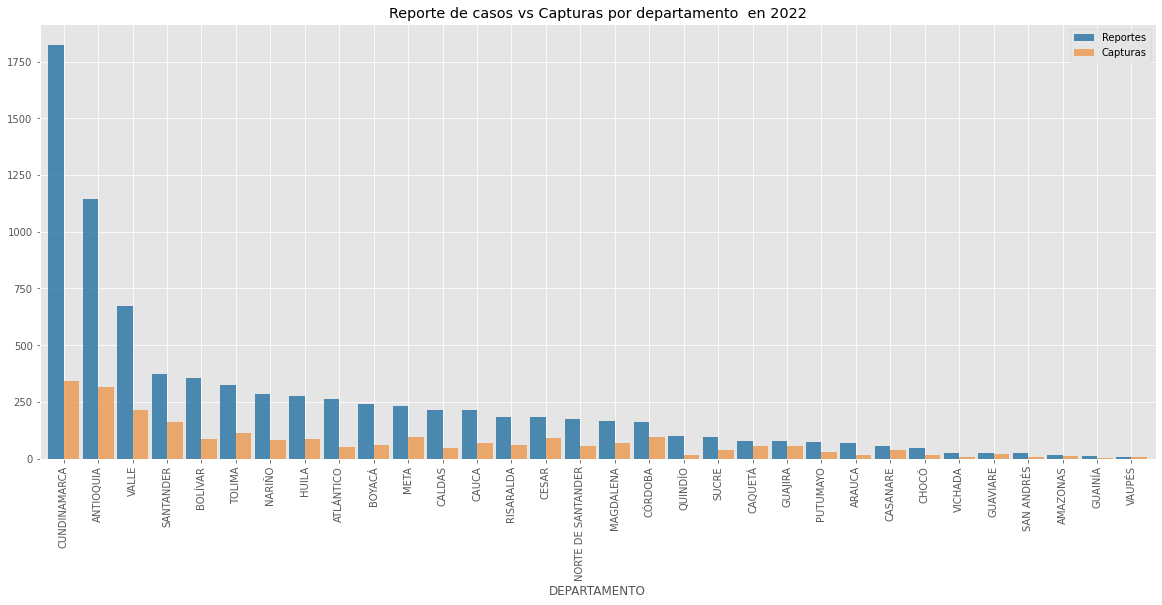

In [28]:
coloresgrafico = ["#2471A3","#EB984E"]
plot_Size_departamento.plot(x="DEPARTAMENTO", y=["Reportes", "Capturas"], kind="bar",title='Reporte de casos vs Capturas por departamento  en 2022',alpha = 0.8, width = 0.9, figsize=(20,8), color =coloresgrafico)
plt.show()